# Machine Learning with Tree-Based Models in Python - Part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import  LinearRegression

from mlxtend.plotting import plot_decision_regions

SEED = 1

## Datasets

### Breast Cancer

In [2]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [3]:
df_breast_cancer = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df_breast_cancer['diagnosis'] = breast_cancer.target

### Auto-mpg

In [221]:
df_auto_mpg = pd.read_csv('../datasets/auto-mpg.csv')
df_auto_mpg = pd.get_dummies(df_auto_mpg)

## Classification and Regression Trees
Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. In this chapter, you'll be introduced to the CART algorithm.

### Train your first classification tree
In this exercise you'll work with the Wisconsin Breast Cancer Dataset from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to X_train and X_test, while the arrays of labels are assigned to y_train and y_test where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called SEED which is set to 1.

In [4]:
features = ['mean radius', 'mean concave points']

In [5]:
X, y = df_breast_cancer[features], df_breast_cancer.iloc[:,-1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

In [7]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=SEED)

In [8]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [9]:
# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 1 1 0]


### Evaluate the classification tree
Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

The trained model dt from the previous exercise is loaded in your workspace along with the test set features matrix X_test and the array of labels y_test.

In [10]:
# Predict test set labels
y_pred = dt.predict(X_test)

In [11]:
# Compute test set accuracy  
accuracy_gini = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(accuracy_gini))

Test set accuracy: 0.89


### Logistic regression vs classification tree
A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

We have written a custom function called plot_labeled_decision_regions() that you can use to plot the decision regions of a list containing two trained classifiers. You can type help(plot_labeled_decision_regions) in the IPython shell to learn more about this function.

X_train, X_test, y_train, y_test, the model dt that you've trained in an earlier exercise , as well as the function plot_labeled_decision_regions() are available in your workspace.

In [185]:
def plot_labeled_decision_regions(X,y, models):    
    '''
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(6.0,2.7), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()

In [12]:
# Instatiate logreg
logreg = LogisticRegression(random_state=SEED)

In [13]:
# Fit logreg to the training set
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [188]:
# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

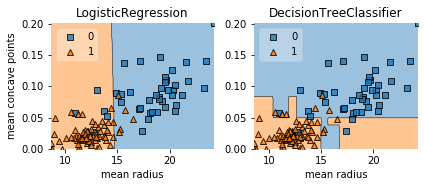

In [189]:
# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

### Using entropy as a criterion
In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

X_train as well as the array of labels y_train are available in your workspace.

In [190]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

In [191]:
# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

### Entropy vs Gini index
In this exercise you'll compare the test set accuracy of dt_entropy to the accuracy of another tree named dt_gini. The tree dt_gini was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword 'gini'.

X_test, y_test, dt_entropy, as well as accuracy_gini which corresponds to the test set accuracy achieved by dt_gini are available in your workspace.

In [192]:
# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

In [193]:
# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

In [194]:
# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

Accuracy achieved by using entropy:  0.9122807017543859


In [195]:
# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using the gini index:  0.8947368421052632


### Train your first regression tree
In this exercise, you'll train a regression tree to predict the mpg (miles per gallon) consumption of cars in the auto-mpg dataset using all the six available features.

The dataset is processed for you and is split to 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [222]:
X, y = df_auto_mpg.iloc[:, 1:], df_auto_mpg.iloc[:, 0]

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [225]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [226]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.13, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3, splitter='best')

### Evaluate the regression tree
In this exercise, you will evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

The features matrix X_test, the array y_test, as well as the decision tree regressor dt that you trained in the previous exercise are available in your workspace.

In [227]:
# Compute y_pred
y_pred = dt.predict(X_test)

In [228]:
# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

In [229]:
# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

In [230]:
# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.27


### Linear regression vs regression tree
In this exercise, you'll compare the test set RMSE of dt to that achieved by a linear regression model. We have already instantiated a linear regression model lr and trained it on the same dataset as dt.

The features matrix X_test, the array of labels y_test, the trained linear regression model lr, mean_squared_error function which was imported under the alias MSE and rmse_dt from the previous exercise are available in your workspace.

In [232]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [233]:
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

In [234]:
# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

In [235]:
# Compute rmse_lr
rmse_lr = mse_lr ** (1/2)

In [236]:
# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

Linear Regression test set RMSE: 3.98


In [237]:
# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Regression Tree test set RMSE: 4.27
